# Final Project - Bilal Najar

# Feature Extraction

In [6]:
# Import necessary libraries
import os
import pretty_midi
import pandas as pd
import numpy as np

# Function to extract note-level and complex features from a single MIDI file
def extract_features(midi_file_path):
    try:
        midi_data = pretty_midi.PrettyMIDI(midi_file_path)
        notes = []
        for instrument in midi_data.instruments:
            for note in instrument.notes:
                notes.append([
                    instrument.program,  # Instrument program number
                    instrument.is_drum,  # Is the instrument a drum
                    note.start,  # Note start time
                    note.end,  # Note end time
                    note.pitch,  # Note pitch
                    note.velocity  # Note velocity
                ])
        
        # Extract tempo changes and compute statistics
        tempos, tempo_times = midi_data.get_tempo_changes()
        tempo_mean = np.mean(tempos) if len(tempos) > 0 else 0
        tempo_min = np.min(tempos) if len(tempos) > 0 else 0
        tempo_max = np.max(tempos) if len(tempos) > 0 else 0
        tempo_var = np.var(tempos) if len(tempos) > 0 else 0
        
        # Extract key signature changes and convert to numeric format
        key_signatures = [ks.key_number for ks in midi_data.key_signature_changes]
        key_mean = np.mean(key_signatures) if len(key_signatures) > 0 else 0
        key_min = np.min(key_signatures) if len(key_signatures) > 0 else 0
        key_max = np.max(key_signatures) if len(key_signatures) > 0 else 0
        key_var = np.var(key_signatures) if len(key_signatures) > 0 else 0
        
        # Extract time signature changes and convert to numeric format
        time_signatures = [(ts.numerator, ts.denominator) for ts in midi_data.time_signature_changes]
        time_numerators = [ts[0] for ts in time_signatures]
        time_denominators = [ts[1] for ts in time_signatures]
        time_numerator_mean = np.mean(time_numerators) if len(time_numerators) > 0 else 0
        time_denominator_mean = np.mean(time_denominators) if len(time_denominators) > 0 else 0

        for note in notes:
            note += [tempo_mean, tempo_min, tempo_max, tempo_var, key_mean, key_min, key_max, key_var, time_numerator_mean, time_denominator_mean]

        return notes
    except Exception as e:
        print(f"Error processing {midi_file_path}: {e}")
        return []

# Function to extract features from all MIDI files in the dataset
def extract_features_from_directory(directory_path):
    data = []
    for composer in os.listdir(directory_path):
        composer_path = os.path.join(directory_path, composer)
        if os.path.isdir(composer_path):
            for midi_file in os.listdir(composer_path):
                if midi_file.endswith('.mid'):
                    file_path = os.path.join(composer_path, midi_file)
                    notes = extract_features(file_path)
                    for note in notes:
                        data.append([composer] + note)
    columns = ['composer', 'instrument_program', 'is_drum', 'start', 'end', 'pitch', 'velocity', 'tempo_mean', 'tempo_min', 'tempo_max', 'tempo_var', 'key_mean', 'key_min', 'key_max', 'key_var', 'time_numerator_mean', 'time_denominator_mean']
    return pd.DataFrame(data, columns=columns)

# Extract features from the entire dataset
dataset_path = '/Users/bilalnajar/PycharmProjects/AAI-511/Composers'  # Path to dataset directory containing composer subdirectories (Composers/ComposerName/*.mid)
df = extract_features_from_directory(dataset_path)

# Save the extracted features to a new CSV file
df.to_csv('extracted_features_dataset_encoded.csv', index=False)

print("Feature Extraction Complete and saved to 'extracted_features_dataset_encoded.csv'")
df.head()

/opt/anaconda3/envs/AAI-511/lib/python3.11/site-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Error processing /Users/bilalnajar/PycharmProjects/AAI-511/Composers/Beethoven/Anhang 14-3.mid: Could not decode key with 3 flats and mode 255
Feature Extraction Complete and saved to 'extracted_features_dataset_encoded.csv'


,composer,instrument_program,is_drum,start,end,pitch,velocity,tempo_mean,tempo_min,tempo_max,tempo_var,key_mean,key_min,key_max,key_var,time_numerator_mean,time_denominator_mean
0,Mozart,68,False,2.068964,3.825428,75,86,330.70389,0.0,404.032634,10899.555502,3.0,3,3,0.0,4.0,4.0
1,Mozart,68,False,2.068964,3.825428,67,86,330.70389,0.0,404.032634,10899.555502,3.0,3,3,0.0,4.0,4.0
2,Mozart,68,False,4.137928,5.894392,79,86,330.70389,0.0,404.032634,10899.555502,3.0,3,3,0.0,4.0,4.0
3,Mozart,68,False,4.137928,5.894392,70,86,330.70389,0.0,404.032634,10899.555502,3.0,3,3,0.0,4.0,4.0
4,Mozart,68,False,6.206892,8.017235,82,86,330.70389,0.0,404.032634,10899.555502,3.0,3,3,0.0,4.0,4.0


# Data Cleaning and Preprocessing

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the original dataset
original_df = pd.read_csv('extracted_features_dataset_encoded.csv')

# Create a copy of the original dataset for preprocessing
df = original_df.copy()

# Handling missing values
df.fillna(method='ffill', inplace=True)

# Normalizing features
scaler = MinMaxScaler()
df[['start', 'end', 'pitch', 'velocity', 'tempo_mean', 'tempo_min', 'tempo_max', 'tempo_var', 'key_mean', 'key_min', 'key_max', 'key_var', 'time_numerator_mean', 'time_denominator_mean']] = scaler.fit_transform(df[['start', 'end', 'pitch', 'velocity', 'tempo_mean', 'tempo_min', 'tempo_max', 'tempo_var', 'key_mean', 'key_min', 'key_max', 'key_var', 'time_numerator_mean', 'time_denominator_mean']])

# Encoding categorical data
label_encoder = LabelEncoder()
df['composer'] = label_encoder.fit_transform(df['composer'])

# Save the preprocessed data to a new CSV file
df.to_csv('preprocessed_features_dataset_encoded.csv', index=False)

print("Data Cleaning and Preprocessing Complete and saved to 'preprocessed_features_dataset_encoded.csv'")
df.head()

/var/folders/bt/spx_pkps3xs3hctqcx6dj9kw0000gn/T/ipykernel_99046/3171745523.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Data Cleaning and Preprocessing Complete and saved to 'preprocessed_features_dataset_encoded.csv'


,composer,instrument_program,is_drum,start,end,pitch,velocity,tempo_mean,tempo_min,tempo_max,tempo_var,key_mean,key_min,key_max,key_var,time_numerator_mean,time_denominator_mean
0,3,68,False,0.001530,0.002787,0.673469,0.674603,0.353389,0.0,0.080288,0.026982,0.136364,0.136364,0.130435,0.0,0.333333,0.25
1,3,68,False,0.001530,0.002787,0.591837,0.674603,0.353389,0.0,0.080288,0.026982,0.136364,0.136364,0.130435,0.0,0.333333,0.25
2,3,68,False,0.003060,0.004316,0.714286,0.674603,0.353389,0.0,0.080288,0.026982,0.136364,0.136364,0.130435,0.0,0.333333,0.25
3,3,68,False,0.003060,0.004316,0.622449,0.674603,0.353389,0.0,0.080288,0.026982,0.136364,0.136364,0.130435,0.0,0.333333,0.25
4,3,68,False,0.004589,0.005886,0.744898,0.674603,0.353389,0.0,0.080288,0.026982,0.136364,0.136364,0.130435,0.0,0.333333,0.25


# Train-Validation-Test Split

In [8]:
from sklearn.model_selection import train_test_split

# Load the preprocessed data
df = pd.read_csv('preprocessed_features_dataset_encoded.csv')

# Define the features (X) and target (y)
X = df.drop(columns=['composer'])
y = df['composer']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=27)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=27)

print("Train-Validation-Test Split Complete")
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Train-Validation-Test Split Complete
Training set size: 1179089
Validation set size: 252662
Test set size: 252662


# Model Building (CNN)

In [9]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(0.2))
    model.add(Conv1D(128, kernel_size=2, activation='relu'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Get input shape and number of classes
input_shape = (X_train.shape[1], 1)
num_classes = len(set(y_train))

# Create and compile the CNN model
cnn_model = create_cnn_model(input_shape, num_classes)
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("CNN Model Created")

CNN Model Created


# Model Training (CNN)

In [10]:
import numpy as np

# Reshape data for CNN model
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1)).astype(np.float32)
X_val_cnn = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1)).astype(np.float32)

# Check the shape of the reshaped data
print(f"Training data shape for CNN: {X_train_cnn.shape}")
print(f"Validation data shape for CNN: {X_val_cnn.shape}")

# Train CNN model
history_cnn = cnn_model.fit(X_train_cnn, y_train, validation_data=(X_val_cnn, y_val), epochs=1, batch_size=32)
print("CNN Model Training Complete")

Training data shape for CNN: (1179089, 16, 1)
Validation data shape for CNN: (252662, 16, 1)
36847/36847 [==============================] - 170s 5ms/step - loss: 0.2309 - accuracy: 0.9118 - val_loss: 0.0772 - val_accuracy: 0.9707
CNN Model Training Complete


# Model Evaluation (CNN)

Test data shape for CNN: (252662, 16, 1)
7896/7896 [==============================] - 5s 620us/step
CNN Model Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     50736
           1       0.98      0.98      0.98    101032
           2       0.93      0.97      0.95     48029
           3       0.99      0.96      0.97     52865

    accuracy                           0.97    252662
   macro avg       0.97      0.97      0.97    252662
weighted avg       0.97      0.97      0.97    252662

Confusion Matrix:
[[49412   158   923   243]
 [  377 98608  1780   267]
 [  138  1289 46378   224]
 [  331   708   913 50913]]
CNN Model Accuracy: 0.9709
CNN Model Precision: 0.9713
CNN Model Recall: 0.9709


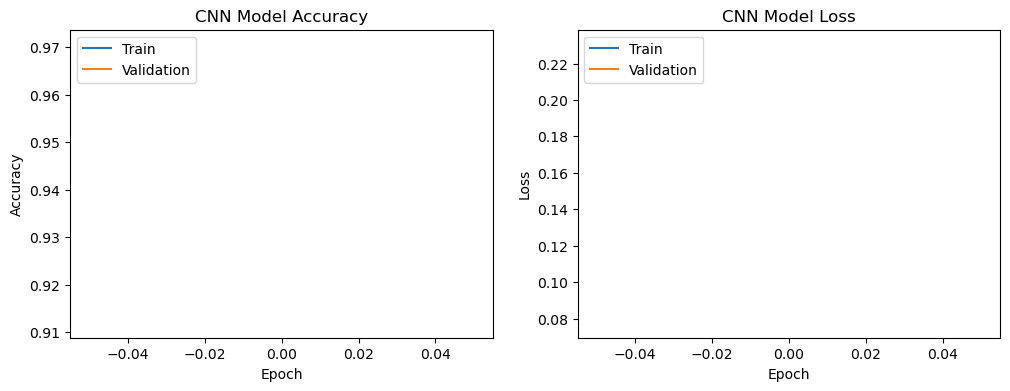

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

# Reshape and convert test data for CNN model
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1)).astype(np.float32)

# Check the shape of the test data
print(f"Test data shape for CNN: {X_test_cnn.shape}")

# Predict the classes for the test set
y_pred_cnn = cnn_model.predict(X_test_cnn).argmax(axis=1)

# Classification report and confusion matrix
print("CNN Model Evaluation:")
print(classification_report(y_test, y_pred_cnn))

conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)
print("Confusion Matrix:")
print(conf_matrix_cnn)

# Calculate and print accuracy, precision, and recall
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
precision_cnn = precision_score(y_test, y_pred_cnn, average='weighted')
recall_cnn = recall_score(y_test, y_pred_cnn, average='weighted')

print(f"CNN Model Accuracy: {accuracy_cnn:.4f}")
print(f"CNN Model Precision: {precision_cnn:.4f}")
print(f"CNN Model Recall: {recall_cnn:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Model Building (LSTM)

In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Get input shape and number of classes
input_shape = (X_train.shape[1], 1)
num_classes = len(set(y_train))

# Create and compile the LSTM model
lstm_model = create_lstm_model(input_shape, num_classes)
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("LSTM Model Created")

LSTM Model Created


2024-08-04 18:15:13.848161: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-04 18:15:13.848583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-04 18:15:13.849046: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

# Model Training (LSTM)

In [13]:
# Reshape data for LSTM model
X_train_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1)).astype(np.float32)
X_val_lstm = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1)).astype(np.float32)

# Check the shape of the reshaped data
print(f"Training data shape for LSTM: {X_train_lstm.shape}")
print(f"Validation data shape for LSTM: {X_val_lstm.shape}")

# Train LSTM model
history_lstm = lstm_model.fit(X_train_lstm, y_train, validation_data=(X_val_lstm, y_val), epochs=1, batch_size=32)
print("LSTM Model Training Complete")

Training data shape for LSTM: (1179089, 16, 1)
Validation data shape for LSTM: (252662, 16, 1)


2024-08-04 18:15:14.809000: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-04 18:15:14.809505: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-04 18:15:14.810034: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

36846/36847 [============================>.] - ETA: 0s - loss: 0.2636 - accuracy: 0.8907

2024-08-04 18:30:29.630579: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-04 18:30:29.631251: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-04 18:30:29.631798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

36847/36847 [==============================] - 959s 26ms/step - loss: 0.2636 - accuracy: 0.8907 - val_loss: 0.0972 - val_accuracy: 0.9635
LSTM Model Training Complete


# Model Evaluation (LSTM)

Test data shape for LSTM: (252662, 16, 1)
7896/7896 [==============================] - 78s 10ms/step
LSTM Model Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     50736
           1       0.98      0.98      0.98    101032
           2       0.92      0.95      0.93     48029
           3       0.96      0.97      0.97     52865

    accuracy                           0.96    252662
   macro avg       0.96      0.96      0.96    252662
weighted avg       0.96      0.96      0.96    252662

Confusion Matrix:
[[47766   293  2081   596]
 [  310 98722  1401   599]
 [  218  1297 45644   870]
 [   71   650   738 51406]]
LSTM Model Accuracy: 0.9639
LSTM Model Precision: 0.9645
LSTM Model Recall: 0.9639


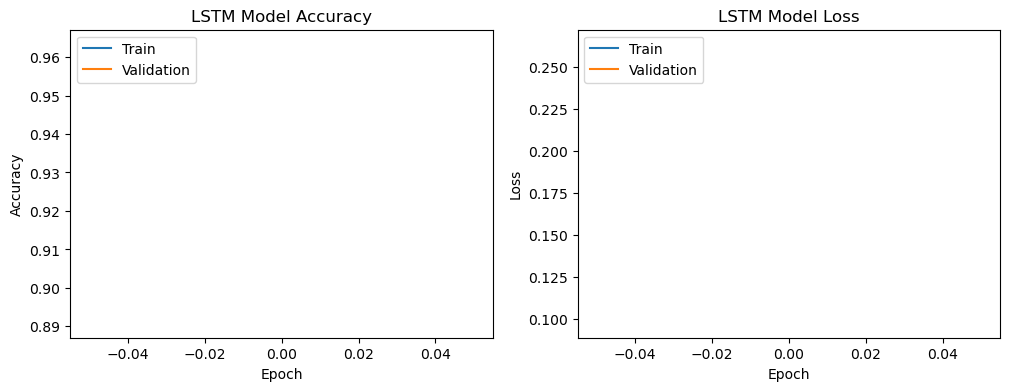

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

# Reshape and convert test data for LSTM model
X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1)).astype(np.float32)

# Check the shape of the test data
print(f"Test data shape for LSTM: {X_test_lstm.shape}")

# Predict the classes for the test set
y_pred_lstm = lstm_model.predict(X_test_lstm).argmax(axis=1)

# Classification report and confusion matrix
print("LSTM Model Evaluation:")
print(classification_report(y_test, y_pred_lstm))

conf_matrix_lstm = confusion_matrix(y_test, y_pred_lstm)
print("Confusion Matrix:")
print(conf_matrix_lstm)

# Calculate and print accuracy, precision, and recall
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm, average='weighted')
recall_lstm = recall_score(y_test, y_pred_lstm, average='weighted')

print(f"LSTM Model Accuracy: {accuracy_lstm:.4f}")
print(f"LSTM Model Precision: {precision_lstm:.4f}")
print(f"LSTM Model Recall: {recall_lstm:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

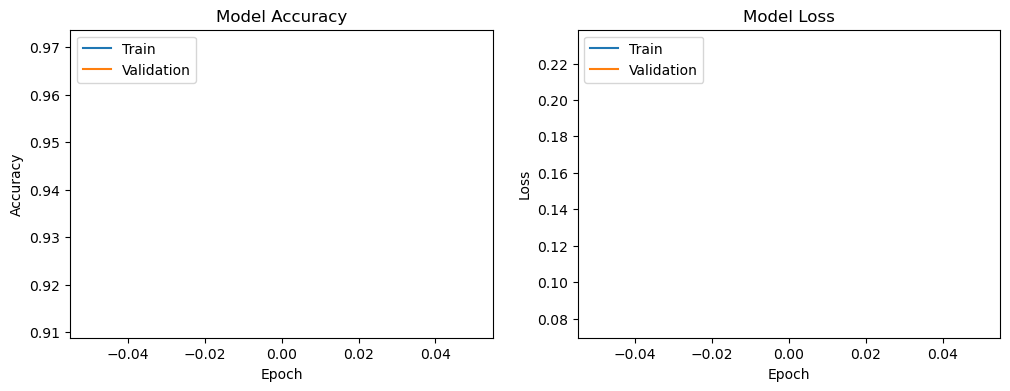

In [17]:
import matplotlib.pyplot as plt

# Assuming you have the history object from model training
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Example usage with CNN model history
plot_training_history(history_cnn)